<a href="https://colab.research.google.com/github/robertomape/BeanClassification/blob/main/Bean_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-plot

In [ ]:
pip install split-folders

In [ ]:
pip install numpy

In [ ]:
pip install matplotlib

In [ ]:
# For Data Processing
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageEnhance

# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
from tqdm import tqdm
import os
import random
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.applications import EfficientNetV2B3
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
import splitfolders
import warnings

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
labels = ['angular_leaf_spot','healthy','bean_rust']

In [ ]:
#Import the data from google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


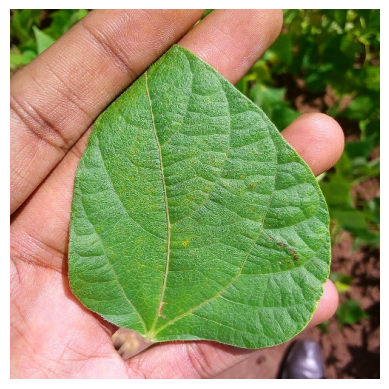

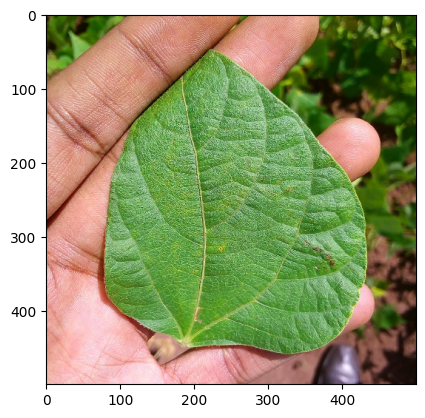

In [ ]:
#This code it to show one image and see if the dataset its working
# Load image from dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/gdrive/My Drive/Bean DataSet/train/train/healthy/healthy_train.1.jpg')

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()
plt.imshow(img)

In [ ]:
X_train = []
y_train = []
image_size = 224
for i in labels:
    folderPath = os.path.join('/content/gdrive/My Drive/Bean DataSet/train/', 'train', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        if img is not None:
            img = cv2.resize(img, (224, 224))
            X_train.append(img)
            y_train.append(i)
        else:
            os.remove(os.path.join(folderPath, j))
            print(f"Deleted {j} because it was None.")


X_val = []
y_val = []

for i in labels:
    folderPath = os.path.join('/content/gdrive/My Drive/Bean DataSet/validation/', 'validation', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        if img is not None:
            img = cv2.resize(img, (224, 224))
            X_val.append(img)
            y_val.append(i)
        else:
            os.remove(os.path.join(folderPath, j))
            print(f"Deleted {j} because it was None.")



X_test = []
y_test = []

for i in labels:
    folderPath = os.path.join('/content/gdrive/My Drive/Bean DataSet/test/','test',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        if img is not None:
            img = cv2.resize(img, (224, 224))
            X_test.append(img)
            y_test.append(i)
        else:
            os.remove(os.path.join(folderPath, j))
            print(f"Deleted {j} because it was None.")


X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

100%|██████████| 43/43 [00:29<00:00,  1.46it/s]


TYPE:angular_leaf_spot


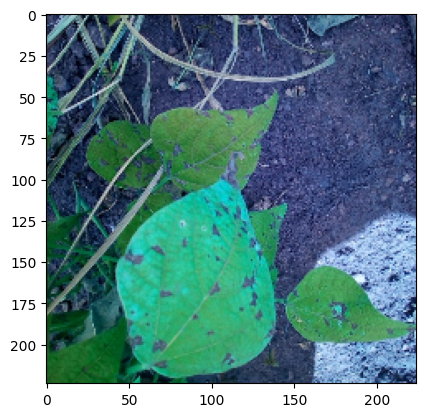

In [ ]:
img = X_train[1]
plt.imshow(img)
print("TYPE:" + y_train[1])

In [ ]:
print('Valores de Train')
print(X_train.shape)
print('Valores de Val')
print(X_val.shape)
print('Valores de Test')
print(X_test.shape)

Valores de Train
(1034, 224, 224, 3)
Valores de Val
(133, 224, 224, 3)
Valores de Test
(128, 224, 224, 3)


In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_val_new = []
for i in y_val:
    y_val_new.append(labels.index(i))
y_val = y_val_new
y_val = tf.keras.utils.to_categorical(y_val)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# Scaling Train, Valid and Test Features
X_train_scaled = X_train.astype('float32')
X_valid_scaled = X_val.astype('float32')
X_test_scaled = X_test.astype('float32')


X_train_scaled /= 255.
X_valid_scaled /= 255.
X_test_scaled /= 255.

In [ ]:
minvalue = np.min(X_train)
maxvalue = np.max(X_train)
minvalues = np.min(X_train_scaled)
maxvalues = np.max(X_train_scaled)
print(minvalue)
print(maxvalue)
print(minvalues)
print(maxvalues)

0
255
0.0
1.0


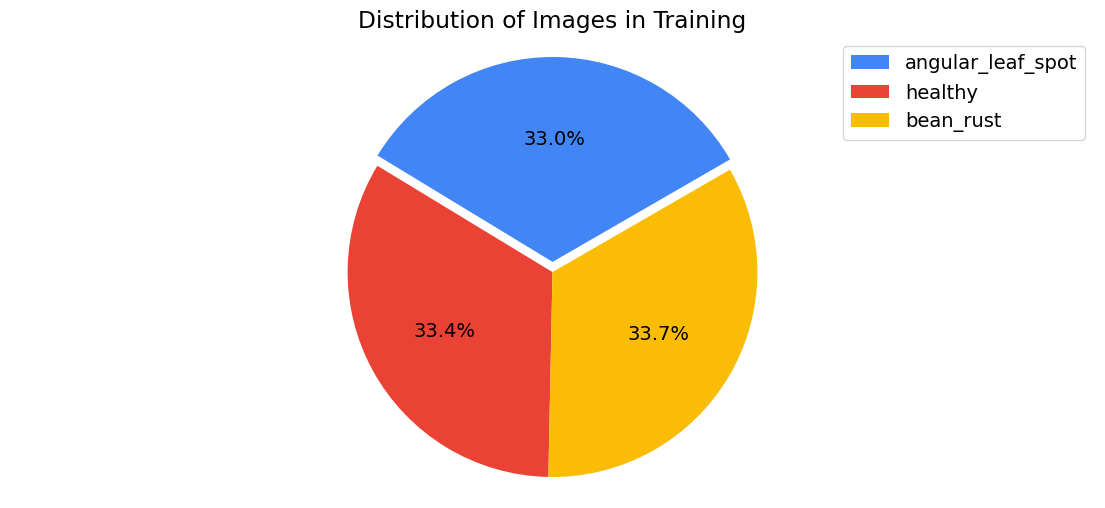

In [ ]:
import os
import matplotlib.pyplot as plt

train_path = '/content/gdrive/My Drive/Bean DataSet/train/train'

# Get the number of images for each label
Healthy = len(os.listdir(os.path.join(train_path, 'healthy')))
angular_leaf_spot = len(os.listdir(os.path.join(train_path, 'angular_leaf_spot')))
bean_Rust = len(os.listdir(os.path.join(train_path, 'bean_rust')))

# Create a list of numerical values that represent the number of images for each label
sizes = [Healthy, angular_leaf_spot, bean_Rust]
labels = ['angular_leaf_spot', 'healthy', 'bean_rust']

# Set up the plot
plt.figure(figsize=(14, 6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie(sizes, colors=colors, autopct='%.1f%%', explode=(0.05, 0, 0),
        startangle=30)

plt.legend(labels, loc='best')
plt.axis('equal')
plt.title('Distribution of Images in Training')
plt.show()


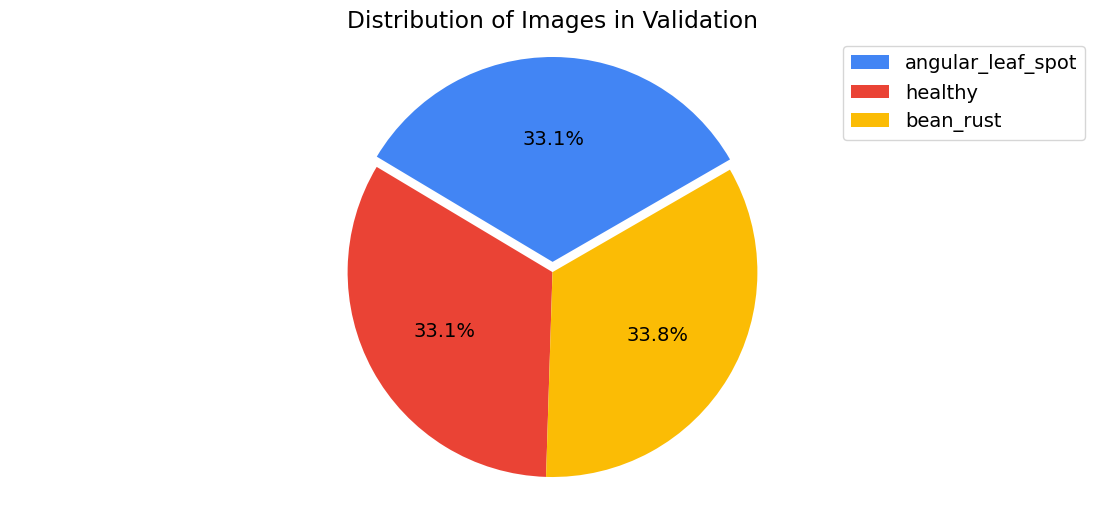

In [ ]:
import os
import matplotlib.pyplot as plt

train_path = '/content/gdrive/My Drive/Bean DataSet/validation/validation'

# Get the number of images for each label
Healthy = len(os.listdir(os.path.join(train_path, 'healthy')))
angular_leaf_spot = len(os.listdir(os.path.join(train_path, 'angular_leaf_spot')))
bean_Rust = len(os.listdir(os.path.join(train_path, 'bean_rust')))

# Create a list of numerical values that represent the number of images for each label
sizes = [Healthy, angular_leaf_spot, bean_Rust]
labels = ['angular_leaf_spot', 'healthy', 'bean_rust']

# Set up the plot
plt.figure(figsize=(14, 6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie(sizes, colors=colors, autopct='%.1f%%', explode=(0.05, 0, 0),
        startangle=30)

plt.legend(labels, loc='best')
plt.axis('equal')
plt.title('Distribution of Images in Validation')
plt.show()

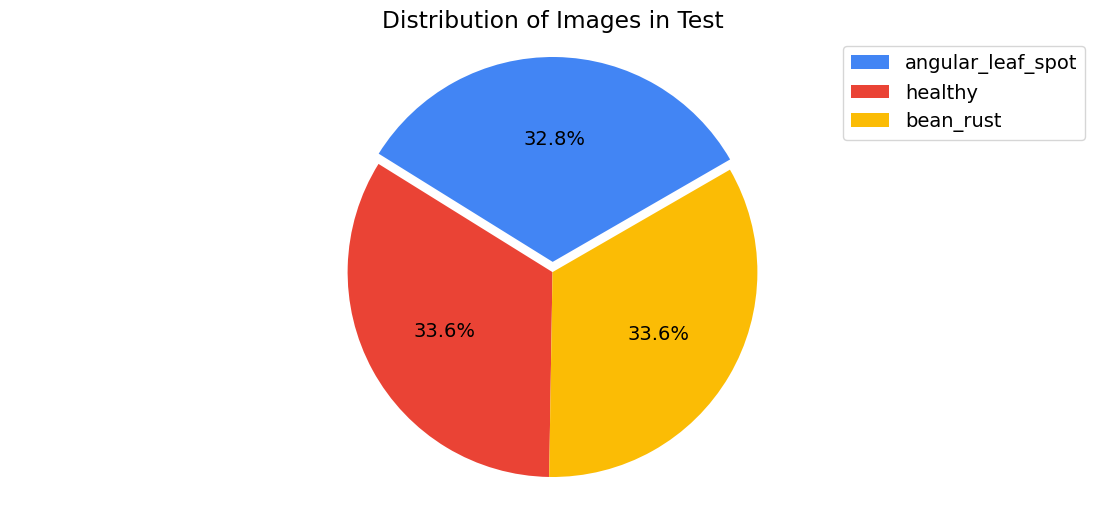

In [ ]:
import os
import matplotlib.pyplot as plt

train_path = '/content/gdrive/My Drive/Bean DataSet/test/test'

# Get the number of images for each label
Healthy = len(os.listdir(os.path.join(train_path, 'healthy')))
angular_leaf_spot = len(os.listdir(os.path.join(train_path, 'angular_leaf_spot')))
bean_Rust = len(os.listdir(os.path.join(train_path, 'bean_rust')))

# Create a list of numerical values that represent the number of images for each label
sizes = [Healthy, angular_leaf_spot, bean_Rust]
labels = ['angular_leaf_spot', 'healthy', 'bean_rust']

# Set up the plot
plt.figure(figsize=(14, 6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie(sizes, colors=colors, autopct='%.1f%%', explode=(0.05, 0, 0),
        startangle=30)

plt.legend(labels, loc='best')
plt.axis('equal')
plt.title('Distribution of Images in Test')
plt.show()

In [ ]:
vgg16 = VGG16(weights='imagenet', input_shape=(image_size,image_size,3), include_top=False)
for layer in vgg16.layers:
    layer.trainable = False

modelvgg16 = Sequential()
modelvgg16.add(vgg16)
modelvgg16.add(Flatten())
modelvgg16.add(Dense(3, activation='softmax'))

modelvgg16.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

# checkpoint
filepath="weightsbestVGG16.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


historyvgg16 = modelvgg16.fit(X_train_scaled, y_train,
                    validation_data=(X_valid_scaled, y_val),
                    batch_size=32,
                    epochs=50,
                    callbacks=callbacks_list)

Epoch 1/50
33/33 [==============================] - ETA: 0s - loss: 1.1254 - categorical_accuracy: 0.6015
Epoch 1: val_categorical_accuracy improved from -inf to 0.67669, saving model to weightsbestVGG16.hdf5
33/33 [==============================] - 21s 238ms/step - loss: 1.1254 - categorical_accuracy: 0.6015 - val_loss: 0.7711 - val_categorical_accuracy: 0.6767
Epoch 2/50
33/33 [==============================] - ETA: 0s - loss: 0.3454 - categorical_accuracy: 0.8578
Epoch 2: val_categorical_accuracy improved from 0.67669 to 0.84211, saving model to weightsbestVGG16.hdf5
33/33 [==============================] - 5s 140ms/step - loss: 0.3454 - categorical_accuracy: 0.8578 - val_loss: 0.4563 - val_categorical_accuracy: 0.8421
Epoch 3/50
33/33 [==============================] - ETA: 0s - loss: 0.1546 - categorical_accuracy: 0.9632
Epoch 3: val_categorical_accuracy improved from 0.84211 to 0.84962, saving model to weightsbestVGG16.hdf5
33/33 [==============================] - 5s 145ms/step -

In [ ]:
modelpred1 = load_model('weightsbestVGG16.hdf5')

In [ ]:
# Obtener labels originales de test
y_true = np.argmax(y_test,axis=1)

# Labels de ENV2B0
y_pred1 = modelpred1.predict(X_test_scaled)
y_pred1 = np.argmax(y_pred1,axis=1)

4/4 [==============================] - 1s 131ms/step


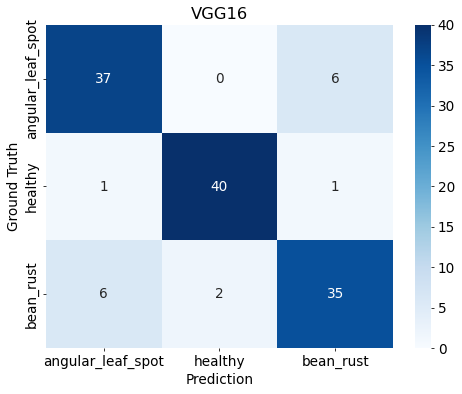

In [ ]:
cnf = confusion_matrix(y_true, y_pred1)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('VGG16')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

In [ ]:
print('VGG16' + classification_report(y_true, y_pred1))

VGG16              precision    recall  f1-score   support

           0       0.84      0.86      0.85        43
           1       0.95      0.95      0.95        42
           2       0.83      0.81      0.82        43

    accuracy                           0.88       128
   macro avg       0.88      0.88      0.88       128
weighted avg       0.87      0.88      0.87       128



In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=30, zoom_range=0.2)


In [ ]:
env2b0second = EfficientNetV2B0(include_top=False,weights="imagenet",input_shape=(image_size,image_size,3), include_preprocessing=False)


modelenv2b0second = env2b0second.output
modelenv2b0second = tf.keras.layers.GlobalAveragePooling2D()(modelenv2b0second)
modelenv2b0second = tf.keras.layers.Dropout(rate=0.5)(modelenv2b0second)
modelenv2b0second = tf.keras.layers.Dense(3,activation='softmax')(modelenv2b0second)
modelenv2b0second = tf.keras.models.Model(inputs=env2b0second.input, outputs = modelenv2b0second)

# Definir el nombre del archivo para guardar los modelos
filepath = "weightsbestENV2B0.hdf5"


checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

modelenv2b0second.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['categorical_accuracy'])

historyenv2b0second = modelenv2b0second.fit(datagen.flow(X_train_scaled, y_train, batch_size = 32),batch_size = 32,  validation_data = (X_valid_scaled, y_val), epochs = 50, callbacks=callbacks_list)

24274472/24274472 [==============================] - 2s 0us/step
Epoch 1/50
33/33 [==============================] - ETA: 0s - loss: 0.5055 - categorical_accuracy: 0.7814
Epoch 1: val_categorical_accuracy improved from -inf to 0.89474, saving model to weightsbestENV2B0.hdf5
33/33 [==============================] - 88s 597ms/step - loss: 0.5055 - categorical_accuracy: 0.7814 - val_loss: 0.3205 - val_categorical_accuracy: 0.8947
Epoch 2/50
33/33 [==============================] - ETA: 0s - loss: 0.1867 - categorical_accuracy: 0.9313
Epoch 2: val_categorical_accuracy improved from 0.89474 to 0.95489, saving model to weightsbestENV2B0.hdf5
33/33 [==============================] - 15s 466ms/step - loss: 0.1867 - categorical_accuracy: 0.9313 - val_loss: 0.1121 - val_categorical_accuracy: 0.9549
Epoch 3/50
33/33 [==============================] - ETA: 0s - loss: 0.1390 - categorical_accuracy: 0.9497
Epoch 3: val_categorical_accuracy did not improve from 0.95489
33/33 [========================

4/4 [==============================] - 2s 59ms/step


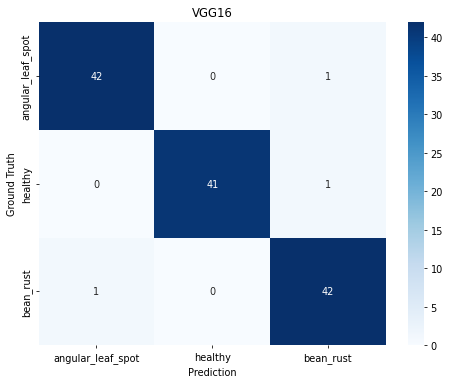

ENV2B0              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       1.00      0.98      0.99        42
           2       0.95      0.98      0.97        43

    accuracy                           0.98       128
   macro avg       0.98      0.98      0.98       128
weighted avg       0.98      0.98      0.98       128



In [ ]:
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
saved_model = load_model(filepath)


# Obtener labels originales de test
y_true = np.argmax(y_test,axis=1)

# Labels de ENV2B0
y_pred2 = saved_model.predict(X_test_scaled)
y_pred2 = np.argmax(y_pred2,axis=1)

cnf = confusion_matrix(y_true, y_pred2)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('VGG16')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

print('ENV2B0' + classification_report(y_true, y_pred2))

In [ ]:
modelenv2b0second.save("M1.h5")
from google.colab import files




In [ ]:
import os
ruta_completa = os.path.abspath("M1.h5")
print(ruta_completa)


/content/M1.h5


4/4 [==============================] - 2s 64ms/step


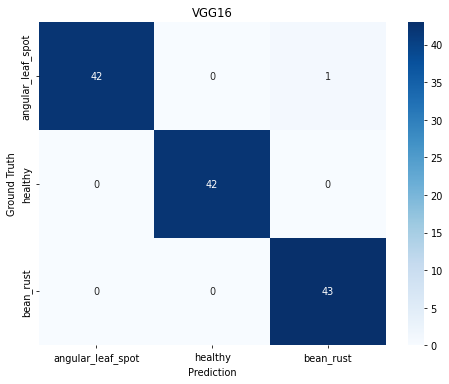

ENV2B0              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      1.00      1.00        42
           2       0.98      1.00      0.99        43

    accuracy                           0.99       128
   macro avg       0.99      0.99      0.99       128
weighted avg       0.99      0.99      0.99       128



In [ ]:
modelpred2 = load_model('/content/M1.h5')

# Obtener labels originales de test
y_true = np.argmax(y_test,axis=1)

# Labels de ENV2B0
y_pred2 = modelpred2.predict(X_test_scaled)
y_pred2 = np.argmax(y_pred2,axis=1)

cnf = confusion_matrix(y_true, y_pred2)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('VGG16')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

print('ENV2B0' + classification_report(y_true, y_pred2))

In [ ]:
env2b0second = EfficientNetV2B0(include_top=False,weights="imagenet",input_shape=(image_size,image_size,3), include_preprocessing=False)


modelenv2b0second = env2b0second.output
modelenv2b0second = tf.keras.layers.GlobalAveragePooling2D()(modelenv2b0second)
modelenv2b0second = tf.keras.layers.Dropout(rate=0.5)(modelenv2b0second)
modelenv2b0second = tf.keras.layers.Dense(3,activation='softmax')(modelenv2b0second)
modelenv2b0second = tf.keras.models.Model(inputs=env2b0second.input, outputs = modelenv2b0second)

modelenv2b0second.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['categorical_accuracy'])

historyenv2b0second = modelenv2b0second.fit(datagen.flow(X_train_scaled, y_train, batch_size = 32),batch_size = 32,  validation_data = (X_valid_scaled, y_val), epochs = 50)

Epoch 1/50
33/33 [==============================] - 65s 463ms/step - loss: 0.4583 - categorical_accuracy: 0.7998 - val_loss: 0.2071 - val_categorical_accuracy: 0.9248
Epoch 2/50
33/33 [==============================] - 14s 428ms/step - loss: 0.1911 - categorical_accuracy: 0.9352 - val_loss: 0.1215 - val_categorical_accuracy: 0.9474
Epoch 3/50
33/33 [==============================] - 15s 445ms/step - loss: 0.1770 - categorical_accuracy: 0.9420 - val_loss: 0.1833 - val_categorical_accuracy: 0.9474
Epoch 4/50
33/33 [==============================] - 14s 425ms/step - loss: 0.0931 - categorical_accuracy: 0.9671 - val_loss: 0.0908 - val_categorical_accuracy: 0.9699
Epoch 5/50
33/33 [==============================] - 16s 471ms/step - loss: 0.0876 - categorical_accuracy: 0.9671 - val_loss: 0.0374 - val_categorical_accuracy: 0.9850
Epoch 6/50
33/33 [==============================] - 14s 423ms/step - loss: 0.0734 - categorical_accuracy: 0.9778 - val_loss: 0.1724 - val_categorical_accuracy: 0.954

In [ ]:
modelenv2b0second.save("M2.h5")

4/4 [==============================] - 2s 59ms/step


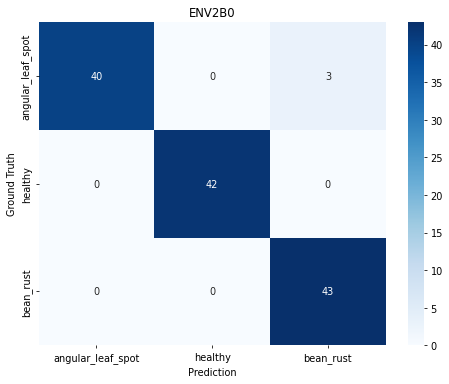

ENV2B0              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       1.00      1.00      1.00        42
           2       0.93      1.00      0.97        43

    accuracy                           0.98       128
   macro avg       0.98      0.98      0.98       128
weighted avg       0.98      0.98      0.98       128



In [ ]:
modelpred3 = load_model('/content/M2.h5')

# Obtener labels originales de test
y_true = np.argmax(y_test,axis=1)

# Labels de ENV2B0
y_pred2 = modelpred3.predict(X_test_scaled)
y_pred2 = np.argmax(y_pred2,axis=1)

cnf = confusion_matrix(y_true, y_pred2)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ENV2B0')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show(ax)

print('ENV2B0' + classification_report(y_true, y_pred2))

In [ ]:
Train = '/content/gdrive/My Drive/Bean DataSet/train/train'